In [179]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import skimage
from skimage.feature import hog
from mnist import MNIST
import os
from skimage import transform 
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import cv2
import skimage.io



(X_train ,y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [73]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import skimage
from skimage.feature import hog
from mnist import MNIST
import os
from skimage import transform 
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import cv2
import skimage.io

# fashionMNIST = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

print(x_train[0].shape)



(28, 28)


In [17]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import skimage
from skimage.feature import hog
from mnist import MNIST
import os
from skimage import transform 
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import cv2
import skimage.io
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.utils import shuffle

In [161]:


# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# # Resize the photos 
# X_train_resized = np.array([resize(image, (32, 32)) for image in X_train])

# Define class labels
class_labels = [0,1,2,3,4]

# # Shuffle the dataset
# X_train, y_train = shuffle(X_train, y_train, random_state=42)


train_mask=np.isin(y_train,class_labels)
test_mask=np.isin(y_test,class_labels)
train_image_filter=X_train[train_mask]   #data1
test_image_filter=X_test[test_mask]      #data
label_image_train=y_train[train_mask]    #data1
label_image_test=y_test[test_mask]


X_train, X_test, y_train, y_test = train_test_split(train_image_filter, label_image_train, test_size=0.2, random_state=42,shuffle=True)


In [162]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(24000, 28, 28) (6000, 28, 28) (24000,) (6000,)


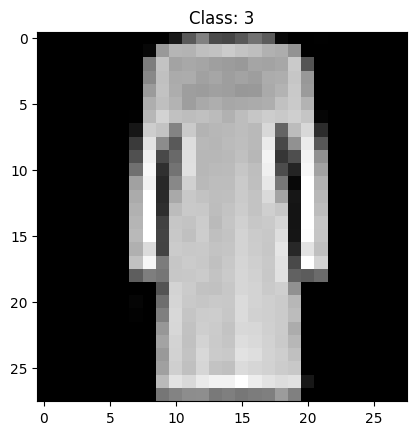

In [163]:
# Display a single resized image from the shuffled training set
plt.imshow(X_train[80], cmap='gray')
plt.title(f"Class: {y_train[80]}")
plt.show()

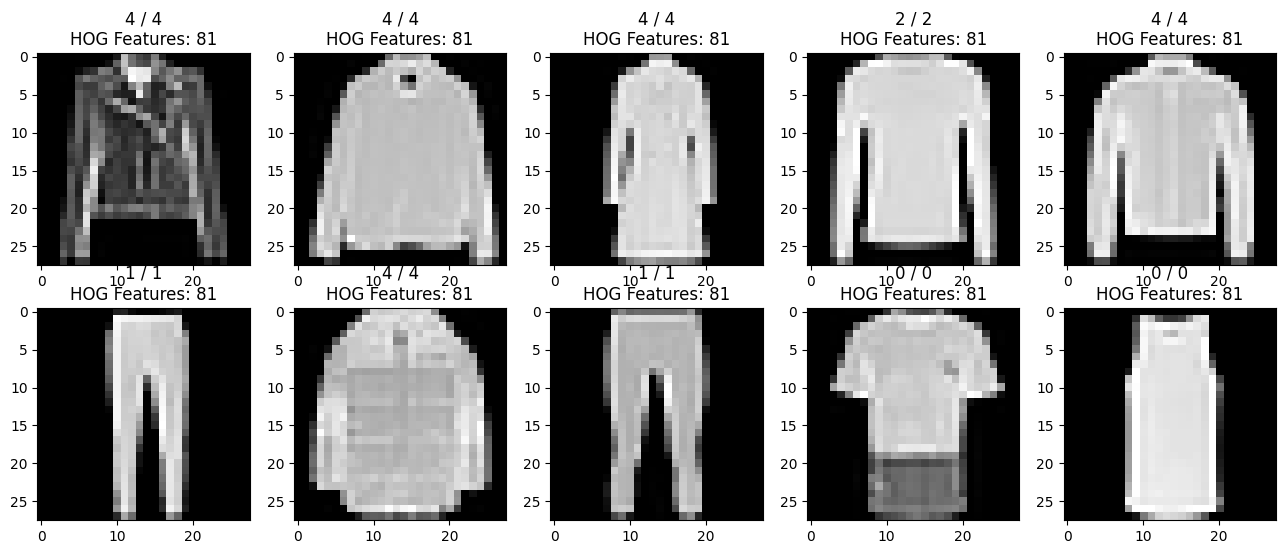

In [164]:
# HOG Feature Extraction Function
def extract_hog_features(image):
    # Compute HOG features and get the HOG image
    features, hog_image = hog(image, visualize=True)
    
    # # Rescale intensity of the HOG image for better visualization
    # hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    
    return features

# Extract HOG features for resized and shuffled images in the training set
hog_features_train = [extract_hog_features(image) for image in X_train]
hog_features_test= [extract_hog_features(image) for image in X_test]

# Display a grid of resized and shuffled images along with their HOG features
plt.figure(figsize=(16, 16))
j = 1
for i in np.random.randint(0, 1000, 10):
    plt.subplot(5, 5, j)
    j += 1
    
    # Display the resized and shuffled image
    plt.imshow(X_train[i], cmap='gray')
    
    # Display class label, actual label, and the number of HOG features
    plt.title('{} / {}\nHOG Features: {}'.format(class_labels[y_train[i]], y_train[i],len(hog_features_train[i])))


# Show all images at once
plt.show()


In [165]:
X_image_train=np.array(hog_features_train)
X_image_test=np.array(hog_features_test)

In [166]:
lo=LogisticRegression()
lo.fit(X_image_train,y_train)
y_predict=lo.predict(X_image_test)
print("accuracy : ",accuracy_score(y_test,y_predict))

accuracy :  0.8591666666666666


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


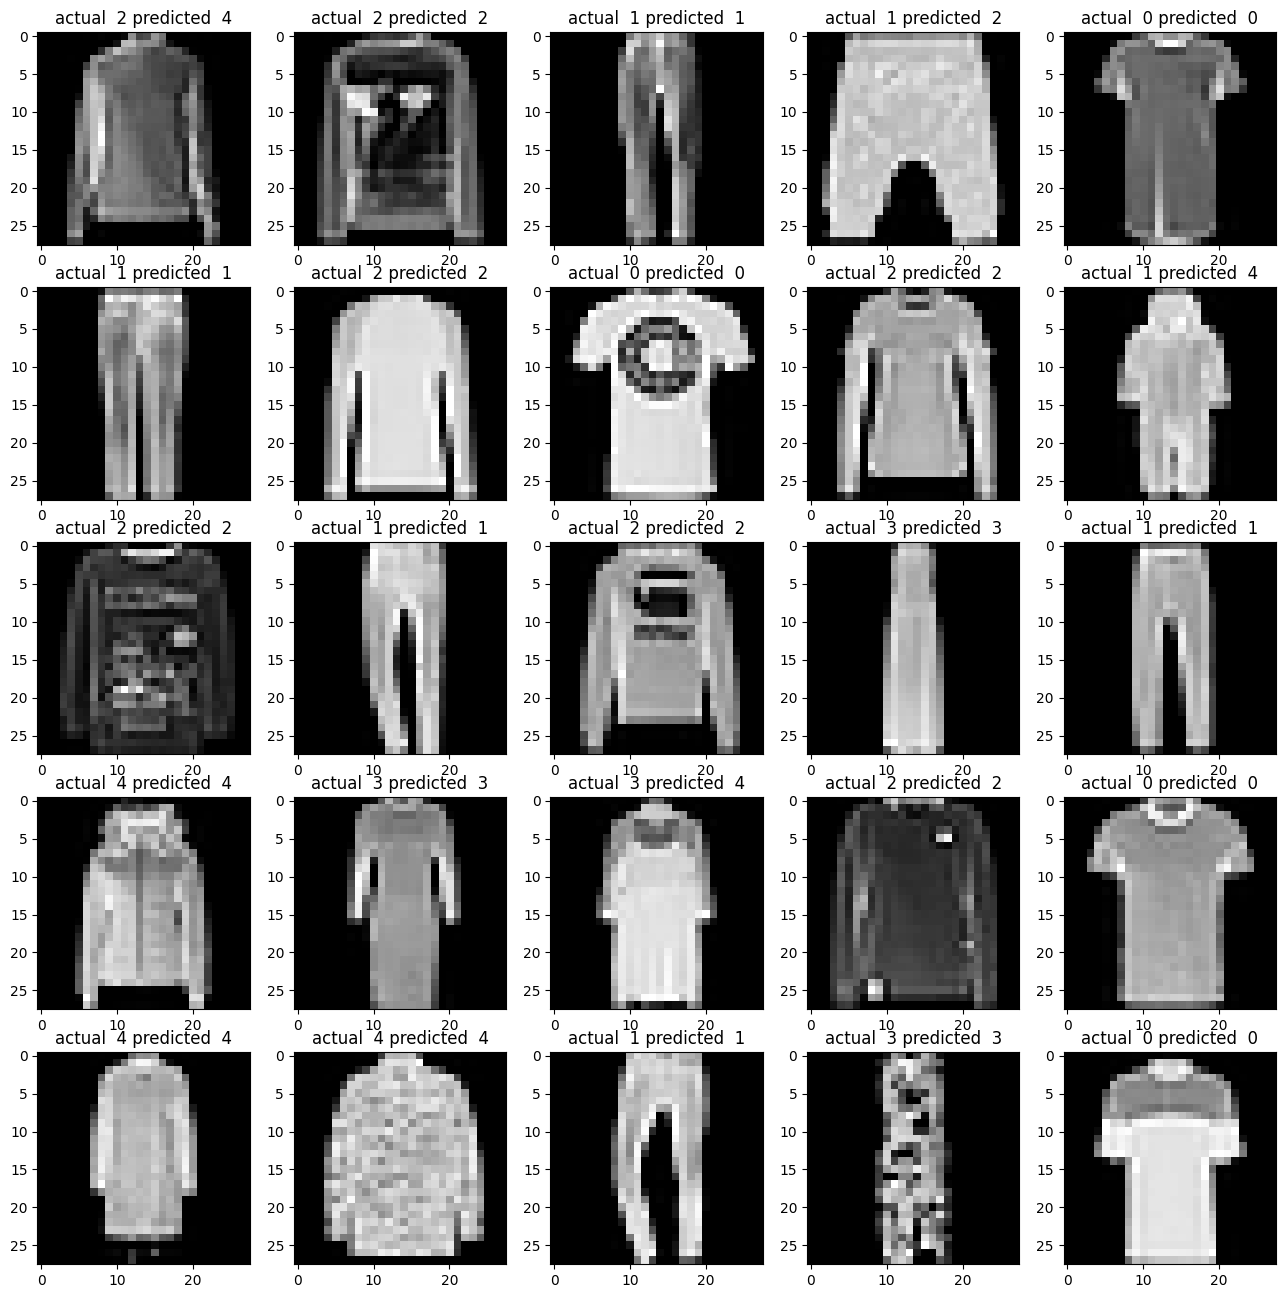

In [167]:
#because of hog (81,)
# Display a grid of resized and shuffled images along with their HOG features
plt.figure(figsize=(16, 16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j)
    j += 1
    
    # Display the resized and shuffled image
    plt.imshow(X_test[i], cmap='gray')
    
    # Display class label, actual label, and the number of HOG features
    plt.title(f"actual  {y_test[i]} predicted  {y_predict[i]}")


# Show all images at once
plt.show()

In [168]:
#confusion_matrix
confusion_matrix(y_test,y_predict)

array([[1091,   14,   52,   60,   18],
       [   3, 1122,   15,   32,    3],
       [  44,    2,  929,   14,  187],
       [  36,   36,   29, 1021,   62],
       [  10,    4,  162,   62,  992]], dtype=int64)

In [18]:
#k_mean
k=KMeans(n_clusters=5,random_state=42)
k.fit(X_image_train)
y_predict_mean=k.predict(X_image_test)

NameError: name 'X_image_train' is not defined

In [176]:
#confusion_matrix
confusion_matrix(y_test,y_predict_mean)

array([[1056,   53,  126,    0,    0],
       [   9, 1124,   42,    0,    0],
       [ 188,    0,  988,    0,    0],
       [ 168,  757,  259,    0,    0],
       [ 109,   38, 1083,    0,    0]], dtype=int64)

In [173]:
X_image_train.shape

(24000, 81)

In [177]:
print("accuracy : ",accuracy_score(y_test,y_predict_mean))

accuracy :  0.528


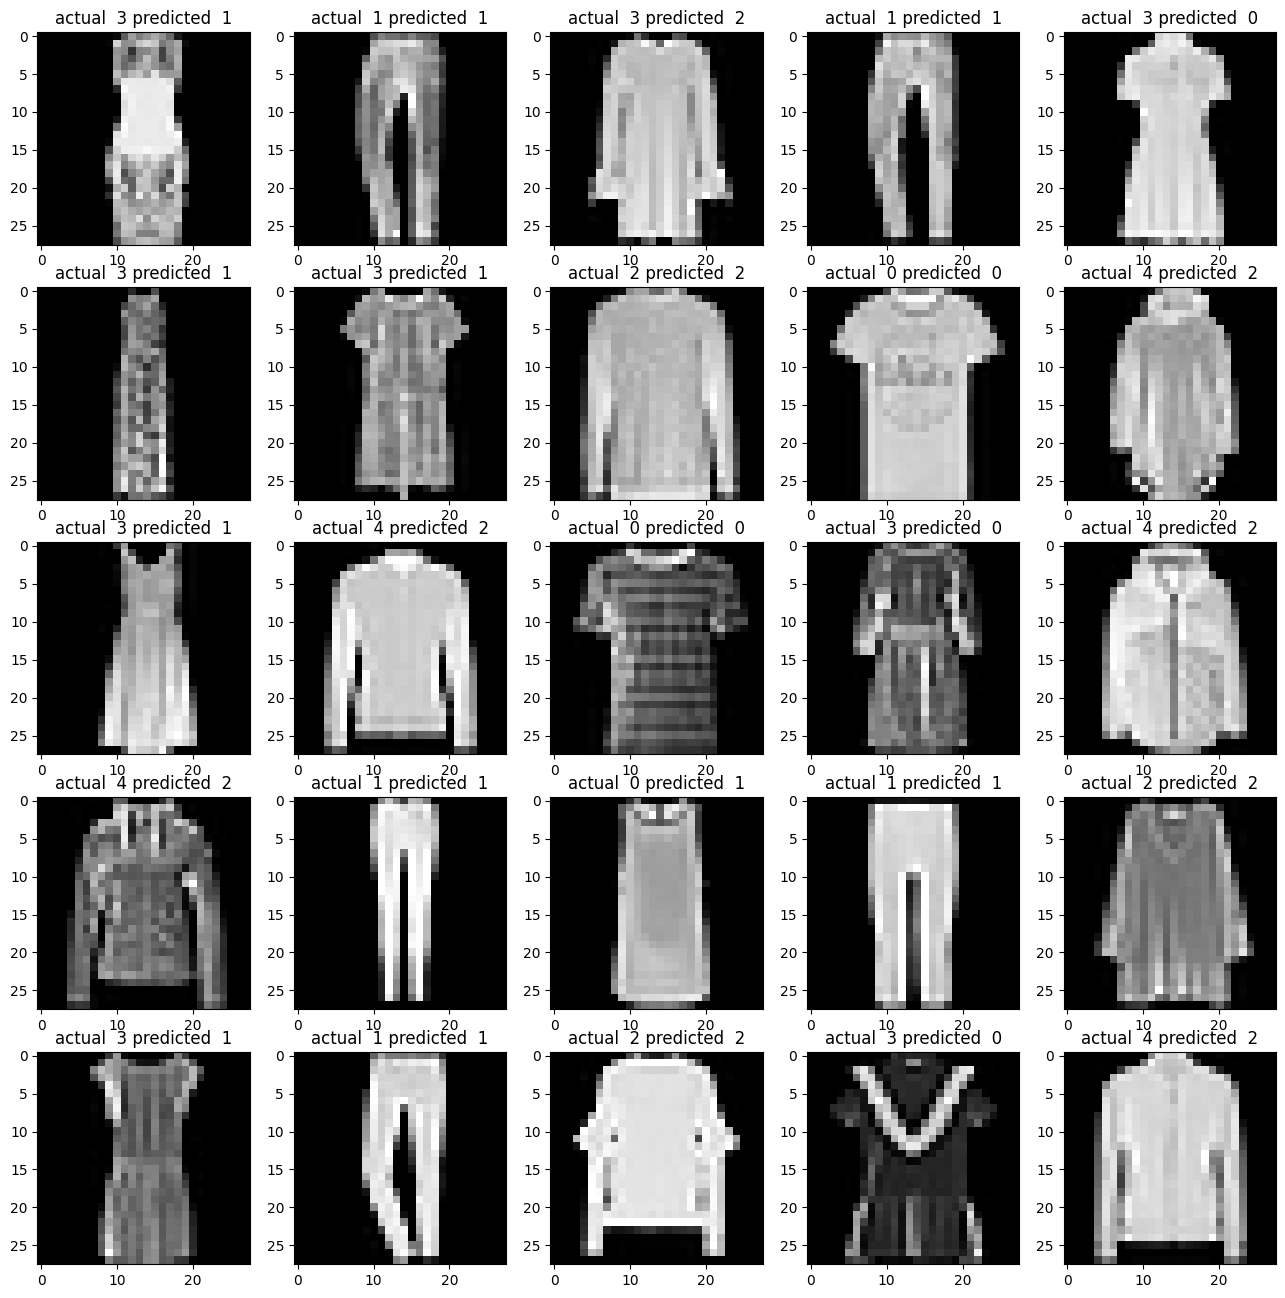

In [178]:
#because of hog (81,)
# Display a grid of resized and shuffled images along with their HOG features for KMean
plt.figure(figsize=(16, 16))
j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5, 5, j)
    j += 1
    
    # Display the resized and shuffled image
    plt.imshow(X_test[i], cmap='gray')
    
    # Display class label, actual label, and the number of HOG features
    plt.title(f"actual  {y_test[i]} predicted  {y_predict_mean[i]}")


# Show all images at once
plt.show()

In [180]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
import os
import numpy as np
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
# plt.imshow(test_images[80],cmap='gray')
# plt.axis('off')
print(fashion_mnist)
# X, Y = mnist_reader.load_mnist(path="c:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py", kind='t10k')


<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'c:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skl

Linear Regression:


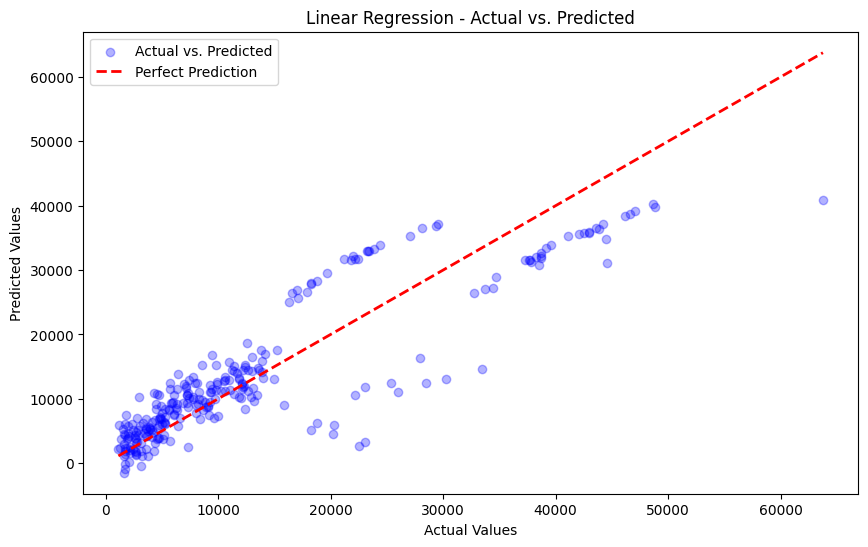

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


score training data (Linear Regression): 0.7417049283233981
score testing data (Linear Regression): 0.7833463107364538
Mean Squared Error (Linear Regression): 33635210.43117843
R-squared (Linear Regression): 0.7833463107364538
Mean Absolute Error (Linear Regression): 4186.5088983664355
Median Absolute Error (Linear Regression): 2685.218216028902


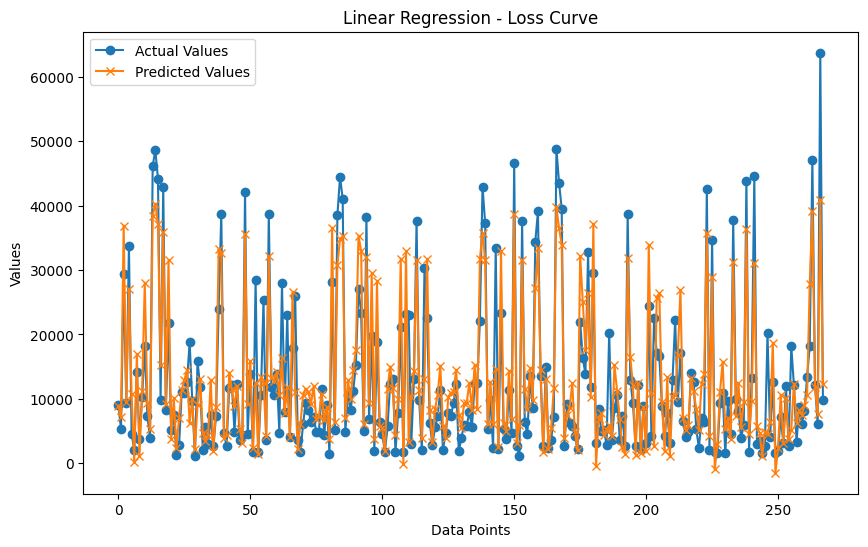


K-Nearest Neighbors:
score training data (K-Nearest Neighbors): 0.8427348645043325
score testing data (K-Nearest Neighbors): 0.7860203933507237
Mean Squared Error (KNN): 33220062.497408804
R-squared (KNN): 0.7860203933507237
Mean Absolute Error (KNN): 3599.650978541045


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skl

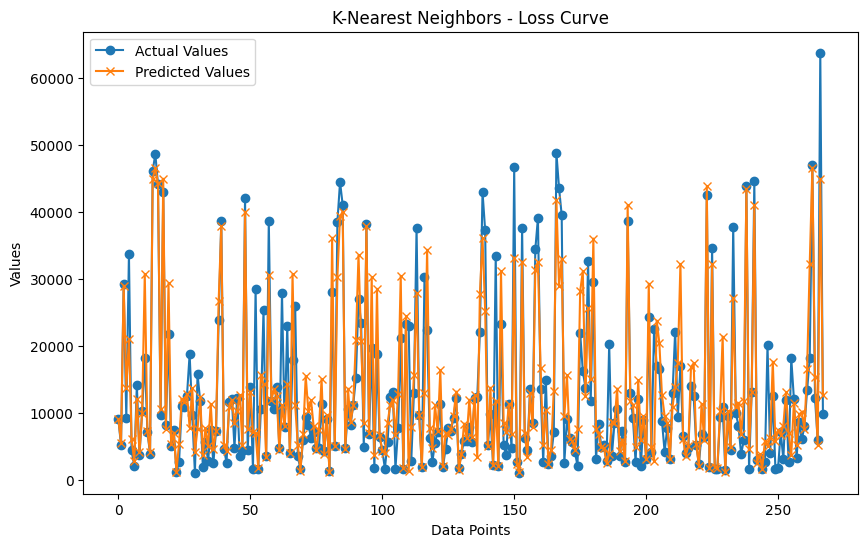

accuracy for linear :  0.7833463107364538
accuracy for knn :  0.7860203933507237


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [60]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import chi2,f_classif,SelectPercentile
from sklearn.metrics import roc_curve, auc

# Load the Diabetes dataset
df = pd.read_csv("../insurance.csv")

# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# Feature Scaling with StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = ['age','bmi','children']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split the dataset into features and target variable 
features = df.drop('charges', axis=1)
target = df['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression
print("Linear Regression:")
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
median_ae_linear = median_absolute_error(y_test, y_pred_linear)

#Linear plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Actual vs. Predicted', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Metrics and Plots
print("score training data (Linear Regression):", linear_reg.score(X_train, y_train))
print("score testing data (Linear Regression):", linear_reg.score(X_test, y_test))
# print("coef:", linear_reg.coef_)
print("Mean Squared Error (Linear Regression):", mse_linear)
print("R-squared (Linear Regression):", r2_linear)
print("Mean Absolute Error (Linear Regression):", mae_linear)
print("Median Absolute Error (Linear Regression):", median_ae_linear)

# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred_linear, label='Predicted Values', marker='x')
plt.title('Linear Regression - Loss Curve')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

# K-Nearest Neighbors
print("\nK-Nearest Neighbors:")
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Metrics and Plots
print("score training data (K-Nearest Neighbors):", knn_reg.score(X_train, y_train))
print("score testing data (K-Nearest Neighbors):", knn_reg.score(X_test, y_test))
print("Mean Squared Error (KNN):", mse_knn)
print("R-squared (KNN):", r2_knn)
print("Mean Absolute Error (KNN):", mae_knn)

# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values', marker='o')
plt.plot(y_pred_knn, label='Predicted Values', marker='x')
plt.title('K-Nearest Neighbors - Loss Curve')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()


#accuracy
print("accuracy for linear : ", linear_reg.score(X_test,y_test))
print("accuracy for knn : ", knn_reg.score(X_test,y_test))




(1338, 7)
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skl


Linear Regression:
score training data (K-Nearest Neighbors): 0.7417049283233981
score testing data (K-Nearest Neighbors): 0.7844133064710003
Mean Squared Error (Linear Regression): 0.21558669352899973
R-squared (Linear Regression): 0.7844133064710003
Mean Absolute Error (Linear Regression): 0.32487583744932474


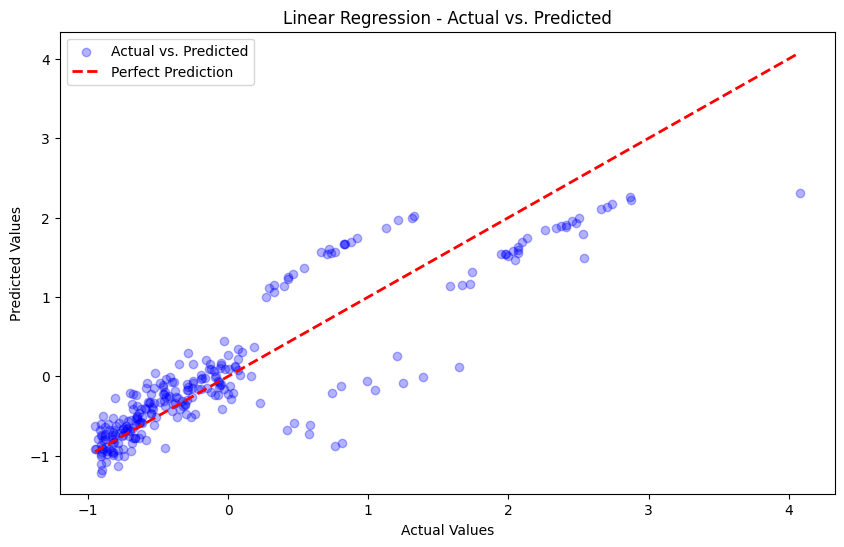

mean of scores :  -0.002758740869134262
k-fold cv predicting scores :  [[-0.2187619 ]
 [-0.47222392]
 [ 1.98089595]
 [-0.24157019]
 [ 1.12047859]
 [-0.31795349]
 [-1.00360773]
 [ 0.23474214]
 [-0.88525384]
 [-0.10838475]
 [ 1.23067517]
 [-0.28928353]
 [-0.62412787]
 [ 2.05628327]
 [ 2.12000801]
 [ 1.93094211]
 [ 0.16757811]
 [ 1.87122698]
 [-0.31271352]
 [ 1.54994345]
 [-0.71298359]
 [-0.32081658]
 [-0.99270325]
 [-0.46083059]
 [-0.04232912]
 [ 0.02258281]
 [ 0.02237781]
 [-0.52397209]
 [-0.18862653]
 [-0.9489421 ]
 [-0.36086605]
 [-0.00957152]
 [-0.74296352]
 [-0.7224205 ]
 [-0.80226462]
 [-0.02183289]
 [-0.96983146]
 [-0.42660263]
 [ 1.72063375]
 [ 1.57603527]
 [-0.76591397]
 [-0.72499042]
 [-0.01003862]
 [-0.15270429]
 [-0.40291228]
 [-0.18070558]
 [-0.61538795]
 [-0.84405785]
 [ 1.83555991]
 [-0.37851996]
 [ 0.16312989]
 [-0.92052114]
 [-0.07496516]
 [-0.92257242]
 [-0.10945129]
 [-0.06620782]
 [-0.72242898]
 [ 1.63868404]
 [-0.10086799]
 [-0.02086602]
 [-0.04423499]
 [-0.18164478]

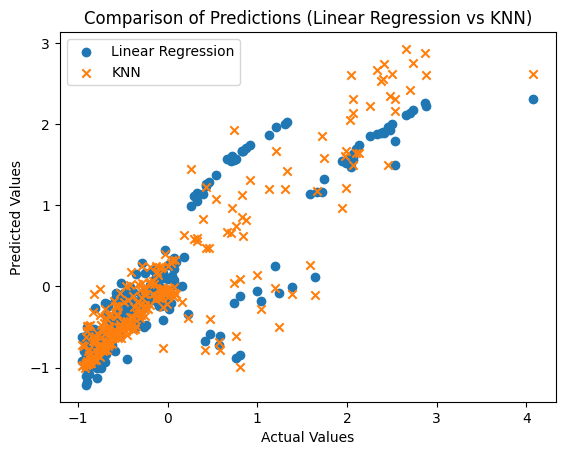

<bound method NDFrame.head of       age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       3  16884.92400
1      18    1  33.770         1       0       2   1725.55230
2      28    1  33.000         3       0       2   4449.46200
3      33    1  22.705         0       0       1  21984.47061
4      32    1  28.880         0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       1  10600.54830
1334   18    0  31.920         0       0       0   2205.98080
1335   18    0  36.850         0       0       2   1629.83350
1336   21    0  25.800         0       0       3   2007.94500
1337   61    0  29.070         0       1       1  29141.36030

[1338 rows x 7 columns]>
score training data (K-Nearest Neighbors): 0.8700580328215536
score testing data (K-Nearest Neighbors): 0.825145703433028
Mean Squared Error (KNN): 0.17485429656697205
R-squared (KNN): 0.8251457034330

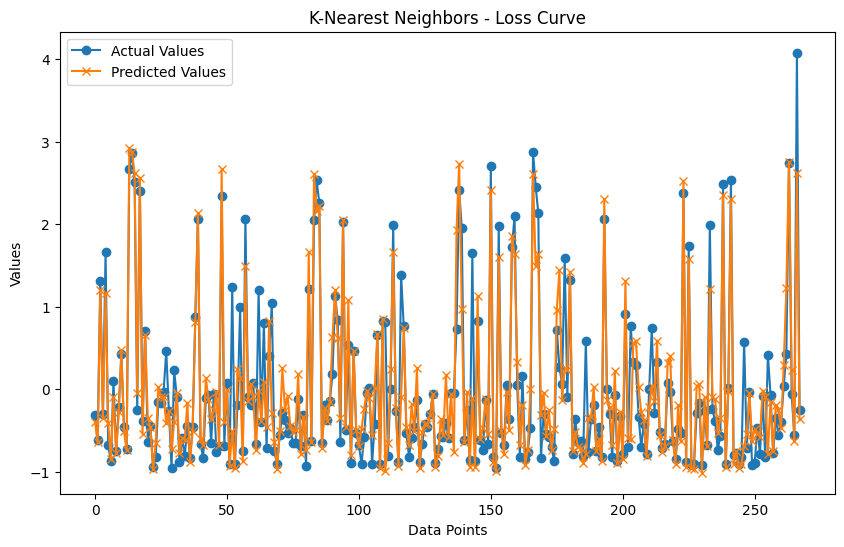

accuracy for linear :  0.7844133064710003
accuracy for knn :  0.825145703433028


In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, make_scorer,roc_curve,auc
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
insurance_data = pd.read_csv("../insurance.csv")

# Display the first few rows of the dataset
print(insurance_data.shape)

# Encode categorical variables (sex, smoker, region) using Label Encoding
label_encoder = LabelEncoder()
insurance_data['sex'] = label_encoder.fit_transform(insurance_data['sex'])
insurance_data['smoker'] = label_encoder.fit_transform(insurance_data['smoker'])
insurance_data['region'] = label_encoder.fit_transform(insurance_data['region'])

# Display the updated dataset
print(insurance_data.head())

# Split the dataset into features (X) and target (y)
X = insurance_data[['age','sex','bmi','children','smoker','region']]
y = insurance_data[['charges']]

# #simple imputed
# imp=SimpleImputer(missing_values=np.nan,strategy='mean')
# imp=imp.fit(X)
# X=imp.transform(X)

scaler = StandardScaler()
# insurance_data[['age','sex','bmi','children','smoker','region']]=scaler.fit_transform(insurance_data[['age','sex','bmi','children','smoker','region']])
# insurance_data[['charges']]=scaler.fit_transform(insurance_data[['charges']])
# print(insurance_data.head())
# Split the dataset into training and testing sets and Scaling with StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
y_train=scaler.fit_transform(y_train)
y_test=scaler.fit_transform(y_test)





# Linear Regression
print("\nLinear Regression:")
linear_reg = LinearRegression()
model=linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)




# Print Linear Regression metrics
print("score training data (K-Nearest Neighbors):", linear_reg.score(X_train, y_train))
print("score testing data (K-Nearest Neighbors):", linear_reg.score(X_test, y_test))
print("Mean Squared Error (Linear Regression):", mse_linear)
print("R-squared (Linear Regression):", r2_linear)
print("Mean Absolute Error (Linear Regression):", mae_linear)

#Linear plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Actual vs. Predicted', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# predivting k-fold cv=10 on testing data
scores=cross_val_predict(model,X_test,y_test,cv=10)
print("mean of scores : ",np.mean(scores))
print("k-fold cv predicting scores : ",scores)


# scoring k-fold cv=10 on trainaing data
scores=cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
print("k-fold cv scores : ",scores)
print("mean of scores : ",np.mean(scores))




# K-Nearest Neighbors
print("\nK-Nearest Neighbors:")
knn_reg = KNeighborsRegressor(n_neighbors=5)
model_knn=knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)



# predivting k-fold cv=10 on testing data
scores=cross_val_predict(model_knn,X_test,y_test,cv=10)
print("mean of scores : ",np.mean(scores))
print("k-fold cv predicting scores  knn: ",scores)


# scoring k-fold cv=10 on trainaing data
scores=cross_val_score(model,X_train,y_train,scoring='r2',cv=10)
print("k-fold cv scores : ",scores)
print("mean of scores knn : ",np.mean(scores))



# Plot the linear regrission
plt.scatter(y_test, y_pred_linear, label='Linear Regression', marker='o')
plt.scatter(y_test, y_pred_knn, label='KNN', marker='x')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predictions (Linear Regression vs KNN)')
plt.legend()
plt.show()

print(insurance_data.head)


# Metrics and Plots for knn
print("score training data (K-Nearest Neighbors):", knn_reg.score(X_train, y_train))
print("score testing data (K-Nearest Neighbors):", knn_reg.score(X_test, y_test))
print("Mean Squared Error (KNN):", mse_knn)
print("R-squared (KNN):", r2_knn)
print("Mean Absolute Error (KNN):", mae_knn)

# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values', marker='o')
plt.plot(y_pred_knn, label='Predicted Values', marker='x')
plt.title('K-Nearest Neighbors - Loss Curve')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()


#accuracy
print("accuracy for linear : ", linear_reg.score(X_test,y_test))
print("accuracy for knn : ", knn_reg.score(X_test,y_test))


# threshold = 0.5  # You may adjust this threshold based on your problem

# # Convert regression predictions to binary classification
# y_pred_binary = np.where(y_pred_linear > threshold, 1, 0)

# # Compute ROC curve
# fpr, tpr, _ = roc_curve(y_test > threshold, y_pred_linear)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(8, 8))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

In [26]:
#a.b

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
dataset=pd.read_csv("../insurance.csv")
le=LabelEncoder()
dataset['sex_']=le.fit_transform(dataset.sex)
dataset['smoker_']=le.fit_transform(dataset.smoker)
dataset['region_']=le.fit_transform(dataset.region)
X=dataset[['age','sex_','bmi','children','smoker_','region_']]
y=dataset[['charges']]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X)
X = imp.transform(X)
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
y_train=sc.fit_transform(y_train)
y_test=sc.fit_transform(y_test)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)
regressor.score(X_test, y_test)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('predict',y_pred[:10])
print('test',y_test[:10]) 
mae=mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('mean_absolute_error',mae)
print('train score',regressor.score(X_train, y_train))

predict [[ 0.00506268]
 [-0.10760882]
 [ 3.35035236]
 [ 0.48954779]
 [-0.29294991]
 [-0.65062379]
 [-0.95033747]
 [ 0.29282693]
 [-0.22090658]
 [-0.40206226]]
test [[-0.07212557]
 [-0.18758151]
 [ 3.45751277]
 [ 0.24432211]
 [-0.08000134]
 [-0.58465445]
 [-0.81051107]
 [ 0.09585377]
 [-0.28672116]
 [-0.49393661]]
mean_absolute_error 0.11800552164950344
train score 0.7492328596243778


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skl

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
dataset=pd.read_csv("../insurance.csv")
le=LabelEncoder()
dataset['sex_']=le.fit_transform(dataset.sex)
dataset['smoker_']=le.fit_transform(dataset.smoker)
dataset['region_']=le.fit_transform(dataset.region)
X=dataset[['age','sex_','bmi','children','smoker_','region_']]
y=dataset[['charges']]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X)
X = imp.transform(X)
sc = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state = 0)
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
y_train=sc.fit_transform(y_train)
y_test=sc.fit_transform(y_test)
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 20, weights='uniform', algorithm = 'auto')    #also can be : ball_tree ,  kd_tree  , brute
KNeighborsRegressorModel.fit(X_train, y_train)

#Calculating Details
print('KNeighborsRegressorModel Train Score is : ' , KNeighborsRegressorModel.score(X_train, y_train))
print('KNeighborsRegressorModel Test Score is : ' , KNeighborsRegressorModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = KNeighborsRegressorModel.predict(X_test)
print('Predicted Value for KNeighborsRegressorModel is : ' , y_pred[:10])
print('real Value for KNeighborsRegressorModel is : ' , y_test[:10])
#----------------------------------------------------
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

KNeighborsRegressorModel Train Score is :  0.8323977304167536
KNeighborsRegressorModel Test Score is :  0.9163221742674382
----------------------------------------------------
Predicted Value for KNeighborsRegressorModel is :  [[-0.29958479]
 [-0.42900158]
 [ 2.62106364]
 [-0.06687961]
 [ 0.01089818]
 [-0.83045397]
 [-0.79310274]
 [ 0.04425786]
 [-0.52537861]
 [-0.51422003]]
real Value for KNeighborsRegressorModel is :  [[-0.07212557]
 [-0.18758151]
 [ 3.45751277]
 [ 0.24432211]
 [-0.08000134]
 [-0.58465445]
 [-0.81051107]
 [ 0.09585377]
 [-0.28672116]
 [-0.49393661]]
Mean Absolute Error Value is :  0.20888915702144809


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skl